In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1000000000, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
large = screen_funds('Equities', 'Domestic', 'Large-Cap')
mid = screen_funds('Equities', 'Domestic', 'Mid-Cap')
small = screen_funds('Equities', 'Domestic', 'Small-Cap')
print(len(large), len(mid), len(small))
quote = Quote(large + mid + small, 75, 21)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

80 20 21
from 2019-04-22 to 2019-07-05 - 121


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

26


,len,mean,std,shrp,drawdown
Symbols,,,,,
SPLV,32,2.941291,1.629872,1.702356,2.660443
USMV,32,3.028319,2.097938,1.364031,2.180427
MTUM,32,3.389296,2.987733,1.078620,2.859384
PDP,32,2.664147,3.457340,0.722370,3.974186
FVD,32,1.630158,2.347042,0.623547,3.793309
FPX,32,1.945439,3.357536,0.529785,5.445800
VIG,32,1.932928,3.474040,0.508417,4.634193
XMLV,32,1.089883,2.030295,0.454720,3.688597
FTCS,32,1.717740,3.625746,0.427794,5.011633


retry backlogs ['IVW', 'MGV', 'DGRO', 'HDV', 'SPYG', 'VOOG', 'SPHQ', 'FTCS', 'IUSG', 'FVD', 'XMLV', 'NOBL', 'FDL', 'VIG', 'VOT', 'PDP', 'FPX', 'IWP', 'DIA', 'JKE', 'PWV', 'USA', 'ADX', 'MTUM', 'SPLV'] at 0.96
retry backlogs ['IVW', 'MGV', 'DGRO', 'HDV', 'SPYG', 'VOOG', 'SPHQ', 'FTCS', 'IUSG', 'FVD', 'XMLV', 'NOBL', 'FDL', 'VIG', 'VOT', 'PDP', 'FPX', 'IWP', 'DIA', 'JKE', 'PWV', 'USA', 'ADX', 'MTUM', 'SPLV'] at 0.97
evicted XMLV 0.9631269626376598
evicted FDL 0.9621362826546981
evicted ADX 0.9606731114532673
retry backlogs ['IVW', 'MGV', 'DGRO', 'HDV', 'SPYG', 'VOOG', 'SPHQ', 'FTCS', 'IUSG', 'FVD', 'NOBL', 'VIG', 'VOT', 'PDP', 'FPX', 'IWP', 'DIA', 'JKE', 'PWV', 'USA', 'MTUM', 'SPLV'] at 0.98
evicted PDP 0.9792491745353052
evicted FPX 0.9795276080453476
evicted JKE 0.9772147253400105
evicted USA 0.9444152638941249
evicted MTUM 0.9755770184810109
retry backlogs ['VOOG', 'IUSG', 'MGV', 'DGRO', 'SPHQ', 'HDV', 'SPYG', 'FVD', 'IVW', 'NOBL', 'FTCS', 'VIG', 'VOT', 'IWP', 'DIA', 'PWV', 'SPLV'] at

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
SPLV,32.0,2.941291,1.629872,-0.950251,2.255241,3.289781,4.272789,4.955302,1.702356,2.660443
Portfolio,32.0,2.941291,1.629872,-0.950251,2.255241,3.289781,4.272789,4.955302,1.702356,2.660443


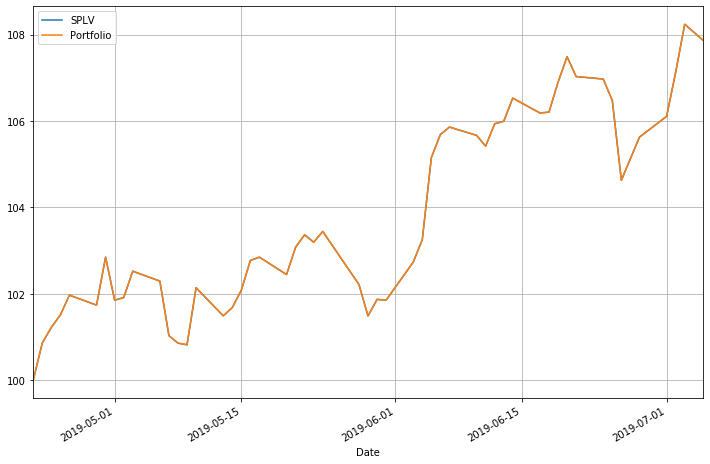

In [4]:
quote.setup_mask(stats.index)
ratio = quote.optimize_portfolio()
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)

In [5]:
Quote(screen_funds('Equities', 'Domestic', 'Preferred'), 75, 21).statistics()

,len,mean,std,shrp,drawdown
Symbols,,,,,
PGX,32,0.968105,0.316023,2.536011,0.582894
PGF,32,0.959830,0.473022,1.676800,0.876261
PFF,32,1.061740,0.570139,1.569921,0.754922
FPE,32,0.929837,0.814610,0.936854,0.570249
VRP,32,0.658297,0.658482,0.746611,0.657068
